An example of looking at just the Deep Drilling Field observations.

In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.db as db

In [8]:
database = 'baseline2018a.db'
# DD Observations are saved as poposalID 5 (usually, check the sqlite to be sure)
sqlWhere = 'proposalId = 5 and filter="r"'
opsdb = db.OpsimDatabase(database)
outDir = 'slicers_test'
resultsDb = db.ResultsDb(outDir=outDir)


In [9]:
slicer = slicers.HealpixSlicer(nside=64)
metric = metrics.Coaddm5Metric()
bundle = metricBundles.MetricBundle(metric, slicer, sqlWhere)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


In [10]:
bgroup = metricBundles.MetricBundleGroup({'1':bundle}, opsdb, outDir=outDir, 
                                         resultsDb=resultsDb)

In [11]:
bgroup.runAll()

Querying database SummaryAllProps with constraint proposalId = 5 and filter="r" for columns ['fieldRA', 'fieldDec', 'fiveSigmaDepth']
Found 17824 visits
Running:  ['1']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


Plotting figures with "proposalId = 5 and filter="r"" constraint now.
monopole: 28.2234  dipole: lon: 63.6434, lat: -8.52544, amp: 0.586269
Plotting complete.


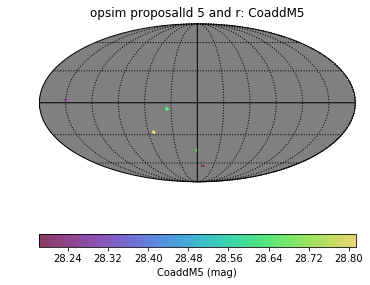

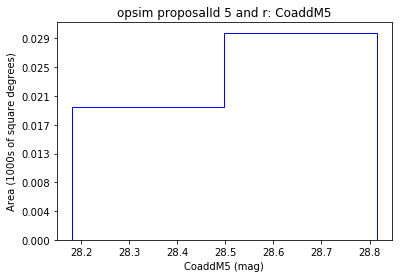

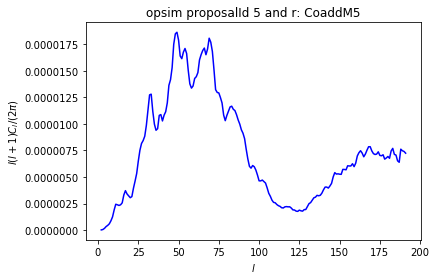

In [13]:
bgroup.plotAll(closefigs=False)

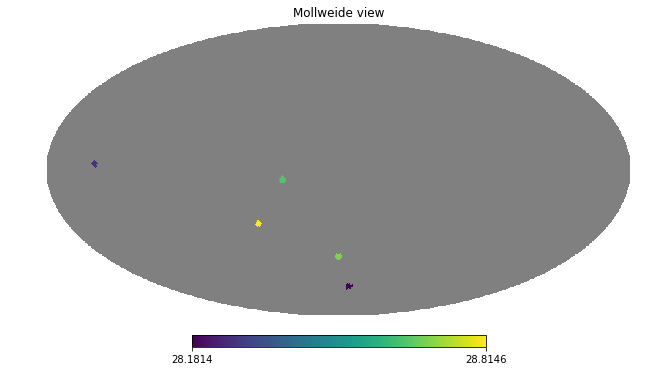

In [17]:
import healpy as hp
hp.mollview(bundle.metricValues)

In [18]:
np.unique(bundle.metricValues)

masked_array(data = [28.181414253733838 28.274992999737464 28.645784475617482 28.69161228027062
 28.814580407009114 --],
             mask = [False False False False False  True],
       fill_value = -1.6375e+30)